In [17]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
import time

In [18]:
def binomial(n,k):
    return factorial(n)/(factorial(k)*factorial(n-k))

def multinomial(lst,n):
    m = factorial(n)
    for i in lst:
        m *= 1/factorial(i)
    return m

In [19]:
# Dados dos numeros n,m lst retorna todas las tuplas que son soluciones de enteros no negativas a la ecuación
# r1 + r2 + ... + rm = n
def lst(n,m):
    Num_sol = []
    if(n == 0):
        Num_sol = [[0]*m]
    elif(m == 1):
        Num_sol = [[n]]
    else:
        for i in range(n+1):
            arr = []
            c = lst(n-i,m-1)
            for x in c:
                arr.append([i]+x)
            Num_sol = Num_sol + arr
    return Num_sol

### Para darse una idea de lo que hace lst, corra la siguiente casilla dandole valores a n y a m

In [20]:
lst(2,3)

[[0, 0, 2], [0, 1, 1], [0, 2, 0], [1, 0, 1], [1, 1, 0], [2, 0, 0]]

In [44]:
# Autodescriptiva
def plot_figures(n,Us,Ss,Ws):
    X,Y,Z = np.asarray(Us),np.asarray(Ss),np.asarray(Ws)
    fig1,ax1 = plt.subplots()
    ax1.plot(Us,Ws,'o',label = 'W vs U')
    ax1.set_xlabel('U')
    ax1.set_ylabel('W')
    ax1.legend()
    plt.show()
    fig1,ax1 = plt.subplots()
    ax1.plot(X/n,Y/n,'o',label = 'S vs U')
    ax1.set_xlabel('U')
    ax1.set_ylabel('S')
    ax1.legend()
    plt.show()

### Simulación

### Idea para contar microestados:
se tiene el vector Num_sol y el vector Us con las energias posibles del sistema , ordenado. W será el vector cuyo elemento_i es el numero de microestados compatibles con la energia Us_i

W = []

Para energia en Us:
    
    W_e = 0

    Para estado en Num_sol:
    
        Si energia_del_estado = energia :
        
            W_e += calcular_degeneracion(estado)
            
            Num_sol.Borrar(estado)
     
     W.agregar(W_e)
            
Lo de borrar estado se hace para que se agilice la ejecucion con el paso de las iteraciones


Más aun, el codigo se ha hecho con un parametro index_ratio, para que el ciclo de arriba empiece por las energias
que poseen mayor numero de microestados, de esta forma el codigo es más eficiente.
Por esta razón, si va a correr el codigo para n grandes, hagalo primero para n pequeños 
y viendo la grafica estime dicho index_ratio ( que depende del espectro). Por ejemplo, si el espectro es equiespaciado,
entonces ponga index_ratio = 0.5
Aun asi, para numeros muy grandes, puede tardar minutos, sin mbargo, puede notar que con numeros pequeños se pueden hacer graficas que se parecen a las que salen con numeros grandes, lucen similares pero escaladas.

In [45]:
#Dada una lista, la ordena de menor a mayor y elimina las redundancias    
def Simplify_Us(Us):
    Us.sort()
    min_energy = Us[0]
    U_new = [min_energy]
    for energy in Us:
        if(energy>min_energy):
            min_energy = energy
            U_new.append(energy)
    return U_new

#Obtiene vector de posibles enerias del sistema
def get_Us(Num_sol,E_spectrum):
    Us = []
    for sol in Num_sol:
        energy = np.dot(E_spectrum,sol)
        Us.append(energy)
    return Simplify_Us(Us)



#Dada una energia U, numero de particulas n, Espetro E_spctrm y arreglo con TODOS los estados de ocupación Num_sol
# retorna la degenarión de U ( W) y la entropia S 
def get_thermo_var(U,n,E_spctrm,Num_sol):
    W = 0
    total_micros = len(Num_sol)
    micro = 0
    for iteration in range(total_micros):
        Energy = np.dot(Num_sol[micro],E_spctrm)
        if(Energy == U):
            W += multinomial(Num_sol[micro],n)
            del Num_sol[micro]
            micro -= 1
        micro += 1
    if(W != 0):
        S = np.log(W)
    else:
        S = -1
    return W,S

#Dado un n ( numero de particulas), y un espectro de enrgia asociado E_spctrm, 
#retorna los vectores degeneración Ws, entropia Ss y energia Us
#Si la bandera flag se ha activado (True), imprimer numeros cada vez que hay una iteración, que deben ir desde 0 hasta len energia
#Esto para que se de una idea del tiempo que falta para acabar la ejecución, tenga en cuenta que el algotimo está hecho
# de tal forma que intenta ser más rapido con el paso de las iteraciones

def simulate(n,E_spctrm,maxi,error,flag = False):
    Num_solutions = lst(n,len(E_spctrm))
    Us = get_Us(Num_solutions, E_spctrm)
    len_U = len(Us)
    Ss = [0]*len_U
    Ws = [0]*len_U
    print('len energia\t',len(Us))
    maximum_index = find_index_maximum(maxi,Us,error)
    index_list = re_organize_index(len_U,maximum_index)
    i = 0
    for index in index_list:
        energy = Us[index]
        W,S = get_thermo_var(energy,n,E_spctrm,Num_solutions)
        Ws[index] = W
        Ss[index] = S
        if(flag):
            print('Iteración #:\t',i,' de\t',len_U)
            i += 1
    return Ws,Ss,Us

def simulate_and_plot(n,E_spctrm,maxi,error = 1,flag = False):
    m = len(E_spctrm)
    Num_sol = lst(n,m)
    Ws,Ss,Us = simulate(n,E_spctrm,maxi,error,flag)
    plot_figures(n,Us,Ss,Ws)
    return Ws,Ss,Us



def simulate_small(n,E_spctrm,flag = False):
    Num_solutions = lst(n,len(E_spctrm))
    Us = get_Us(Num_solutions, E_spctrm)
    len_U = len(Us)
    Ss = [0]*len_U
    Ws = [0]*len_U
    if(flag):
        print('len energia\t',len(Us))
    maximum_index = int(0.5*len_U-1)
    index_list = re_organize_index(len_U,maximum_index)
    i = 0
    for index in index_list:
        energy = Us[index]
        W,S = get_thermo_var(energy,n,E_spctrm,Num_solutions)
        Ws[index] = W
        Ss[index] = S
        if(flag):
            print('Iteración #:\t',i,' de\t',len_U)
            i += 1
    return Ws,Ss,Us



def simulate_small_n(n_small,n,E_spctrm,flag = False):
    Ws_nsmall,Ss_nsmall,Us_nsmall = simulate_small(n_small,E_spctrm,flag)
    index_max = np.argmax(Ss_nsmall)
    maxi = n/n_small*Us_nsmall[index_max]
    return maxi

def find_index_maximum(maxi,Us,error):
    A = []
    for enrg in range(len(Us)):
        if(np.abs(maxi-Us[enrg]) <= error):
            A.append(enrg)
    A.sort()
    return A[-1]

In [46]:
def re_organize_index(L,maxi):
    Up = []
    Up.append(maxi)
    for i in range(1,maxi+1):
        if((maxi+i) < L):
            Up.append(maxi+i)
        Up.append(maxi-i)
    if(2*maxi <L):
        for i in range(2*maxi+1,L):
            Up.append(i)
    return Up

In [47]:
# Especificar parametros
n = 20 #numero de particulas
E_spectrum = [1,2,4,8]
m = len(E_spectrum)
print('Numero total de soluciones como tuplas:\t',binomial(n+m-1,m-1))

Numero total de soluciones como tuplas:	 1771.0


len energia	 136


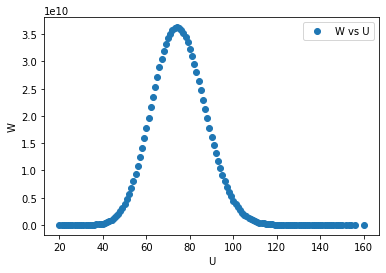

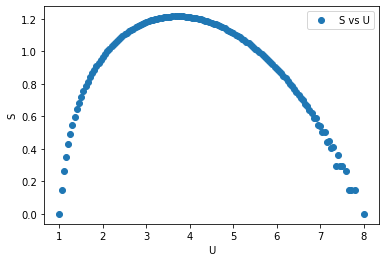

In [48]:
n_small = 5
maxi = simulate_small_n(n_small,n,E_spectrum,flag = False)
Ws,Ss,Us = simulate_and_plot(n,E_spectrum,maxi,1,False)

C:\isaac\anaconda1\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


len energia	 4606
Iteración #:	 0  de	 4606
Iteración #:	 1  de	 4606
Iteración #:	 2  de	 4606
Iteración #:	 3  de	 4606
Iteración #:	 4  de	 4606
Iteración #:	 5  de	 4606
Iteración #:	 6  de	 4606
Iteración #:	 7  de	 4606
Iteración #:	 8  de	 4606
Iteración #:	 9  de	 4606
Iteración #:	 10  de	 4606
Iteración #:	 11  de	 4606
Iteración #:	 12  de	 4606
Iteración #:	 13  de	 4606
Iteración #:	 14  de	 4606
Iteración #:	 15  de	 4606
Iteración #:	 16  de	 4606
Iteración #:	 17  de	 4606
Iteración #:	 18  de	 4606
Iteración #:	 19  de	 4606
Iteración #:	 20  de	 4606
Iteración #:	 21  de	 4606
Iteración #:	 22  de	 4606
Iteración #:	 23  de	 4606
Iteración #:	 24  de	 4606
Iteración #:	 25  de	 4606
Iteración #:	 26  de	 4606
Iteración #:	 27  de	 4606
Iteración #:	 28  de	 4606
Iteración #:	 29  de	 4606
Iteración #:	 30  de	 4606
Iteración #:	 31  de	 4606
Iteración #:	 32  de	 4606
Iteración #:	 33  de	 4606
Iteración #:	 34  de	 4606
Iteración #:	 35  de	 4606
Iteración #:	 36  de

Iteración #:	 297  de	 4606
Iteración #:	 298  de	 4606
Iteración #:	 299  de	 4606
Iteración #:	 300  de	 4606
Iteración #:	 301  de	 4606
Iteración #:	 302  de	 4606
Iteración #:	 303  de	 4606
Iteración #:	 304  de	 4606
Iteración #:	 305  de	 4606
Iteración #:	 306  de	 4606
Iteración #:	 307  de	 4606
Iteración #:	 308  de	 4606
Iteración #:	 309  de	 4606
Iteración #:	 310  de	 4606
Iteración #:	 311  de	 4606
Iteración #:	 312  de	 4606
Iteración #:	 313  de	 4606
Iteración #:	 314  de	 4606
Iteración #:	 315  de	 4606
Iteración #:	 316  de	 4606
Iteración #:	 317  de	 4606
Iteración #:	 318  de	 4606
Iteración #:	 319  de	 4606
Iteración #:	 320  de	 4606
Iteración #:	 321  de	 4606
Iteración #:	 322  de	 4606
Iteración #:	 323  de	 4606
Iteración #:	 324  de	 4606
Iteración #:	 325  de	 4606
Iteración #:	 326  de	 4606
Iteración #:	 327  de	 4606
Iteración #:	 328  de	 4606
Iteración #:	 329  de	 4606
Iteración #:	 330  de	 4606
Iteración #:	 331  de	 4606
Iteración #:	 332  d

Iteración #:	 591  de	 4606
Iteración #:	 592  de	 4606
Iteración #:	 593  de	 4606
Iteración #:	 594  de	 4606
Iteración #:	 595  de	 4606
Iteración #:	 596  de	 4606
Iteración #:	 597  de	 4606
Iteración #:	 598  de	 4606
Iteración #:	 599  de	 4606
Iteración #:	 600  de	 4606
Iteración #:	 601  de	 4606
Iteración #:	 602  de	 4606
Iteración #:	 603  de	 4606
Iteración #:	 604  de	 4606
Iteración #:	 605  de	 4606
Iteración #:	 606  de	 4606
Iteración #:	 607  de	 4606
Iteración #:	 608  de	 4606
Iteración #:	 609  de	 4606
Iteración #:	 610  de	 4606
Iteración #:	 611  de	 4606
Iteración #:	 612  de	 4606
Iteración #:	 613  de	 4606
Iteración #:	 614  de	 4606
Iteración #:	 615  de	 4606
Iteración #:	 616  de	 4606
Iteración #:	 617  de	 4606
Iteración #:	 618  de	 4606
Iteración #:	 619  de	 4606
Iteración #:	 620  de	 4606
Iteración #:	 621  de	 4606
Iteración #:	 622  de	 4606
Iteración #:	 623  de	 4606
Iteración #:	 624  de	 4606
Iteración #:	 625  de	 4606
Iteración #:	 626  d

Iteración #:	 884  de	 4606
Iteración #:	 885  de	 4606
Iteración #:	 886  de	 4606
Iteración #:	 887  de	 4606
Iteración #:	 888  de	 4606
Iteración #:	 889  de	 4606
Iteración #:	 890  de	 4606
Iteración #:	 891  de	 4606
Iteración #:	 892  de	 4606
Iteración #:	 893  de	 4606
Iteración #:	 894  de	 4606
Iteración #:	 895  de	 4606
Iteración #:	 896  de	 4606
Iteración #:	 897  de	 4606
Iteración #:	 898  de	 4606
Iteración #:	 899  de	 4606
Iteración #:	 900  de	 4606
Iteración #:	 901  de	 4606
Iteración #:	 902  de	 4606
Iteración #:	 903  de	 4606
Iteración #:	 904  de	 4606
Iteración #:	 905  de	 4606
Iteración #:	 906  de	 4606
Iteración #:	 907  de	 4606
Iteración #:	 908  de	 4606
Iteración #:	 909  de	 4606
Iteración #:	 910  de	 4606
Iteración #:	 911  de	 4606
Iteración #:	 912  de	 4606
Iteración #:	 913  de	 4606
Iteración #:	 914  de	 4606
Iteración #:	 915  de	 4606
Iteración #:	 916  de	 4606
Iteración #:	 917  de	 4606
Iteración #:	 918  de	 4606
Iteración #:	 919  d

Iteración #:	 1171  de	 4606
Iteración #:	 1172  de	 4606
Iteración #:	 1173  de	 4606
Iteración #:	 1174  de	 4606
Iteración #:	 1175  de	 4606
Iteración #:	 1176  de	 4606
Iteración #:	 1177  de	 4606
Iteración #:	 1178  de	 4606
Iteración #:	 1179  de	 4606
Iteración #:	 1180  de	 4606
Iteración #:	 1181  de	 4606
Iteración #:	 1182  de	 4606
Iteración #:	 1183  de	 4606
Iteración #:	 1184  de	 4606
Iteración #:	 1185  de	 4606
Iteración #:	 1186  de	 4606
Iteración #:	 1187  de	 4606
Iteración #:	 1188  de	 4606
Iteración #:	 1189  de	 4606
Iteración #:	 1190  de	 4606
Iteración #:	 1191  de	 4606
Iteración #:	 1192  de	 4606
Iteración #:	 1193  de	 4606
Iteración #:	 1194  de	 4606
Iteración #:	 1195  de	 4606
Iteración #:	 1196  de	 4606
Iteración #:	 1197  de	 4606
Iteración #:	 1198  de	 4606
Iteración #:	 1199  de	 4606
Iteración #:	 1200  de	 4606
Iteración #:	 1201  de	 4606
Iteración #:	 1202  de	 4606
Iteración #:	 1203  de	 4606
Iteración #:	 1204  de	 4606
Iteración #:	 

Iteración #:	 1454  de	 4606
Iteración #:	 1455  de	 4606
Iteración #:	 1456  de	 4606
Iteración #:	 1457  de	 4606
Iteración #:	 1458  de	 4606
Iteración #:	 1459  de	 4606
Iteración #:	 1460  de	 4606
Iteración #:	 1461  de	 4606
Iteración #:	 1462  de	 4606
Iteración #:	 1463  de	 4606
Iteración #:	 1464  de	 4606
Iteración #:	 1465  de	 4606
Iteración #:	 1466  de	 4606
Iteración #:	 1467  de	 4606
Iteración #:	 1468  de	 4606
Iteración #:	 1469  de	 4606
Iteración #:	 1470  de	 4606
Iteración #:	 1471  de	 4606
Iteración #:	 1472  de	 4606
Iteración #:	 1473  de	 4606
Iteración #:	 1474  de	 4606
Iteración #:	 1475  de	 4606
Iteración #:	 1476  de	 4606
Iteración #:	 1477  de	 4606
Iteración #:	 1478  de	 4606
Iteración #:	 1479  de	 4606
Iteración #:	 1480  de	 4606
Iteración #:	 1481  de	 4606
Iteración #:	 1482  de	 4606
Iteración #:	 1483  de	 4606
Iteración #:	 1484  de	 4606
Iteración #:	 1485  de	 4606
Iteración #:	 1486  de	 4606
Iteración #:	 1487  de	 4606
Iteración #:	 

Iteración #:	 1737  de	 4606
Iteración #:	 1738  de	 4606
Iteración #:	 1739  de	 4606
Iteración #:	 1740  de	 4606
Iteración #:	 1741  de	 4606
Iteración #:	 1742  de	 4606
Iteración #:	 1743  de	 4606
Iteración #:	 1744  de	 4606
Iteración #:	 1745  de	 4606
Iteración #:	 1746  de	 4606
Iteración #:	 1747  de	 4606
Iteración #:	 1748  de	 4606
Iteración #:	 1749  de	 4606
Iteración #:	 1750  de	 4606
Iteración #:	 1751  de	 4606
Iteración #:	 1752  de	 4606
Iteración #:	 1753  de	 4606
Iteración #:	 1754  de	 4606
Iteración #:	 1755  de	 4606
Iteración #:	 1756  de	 4606
Iteración #:	 1757  de	 4606
Iteración #:	 1758  de	 4606
Iteración #:	 1759  de	 4606
Iteración #:	 1760  de	 4606
Iteración #:	 1761  de	 4606
Iteración #:	 1762  de	 4606
Iteración #:	 1763  de	 4606
Iteración #:	 1764  de	 4606
Iteración #:	 1765  de	 4606
Iteración #:	 1766  de	 4606
Iteración #:	 1767  de	 4606
Iteración #:	 1768  de	 4606
Iteración #:	 1769  de	 4606
Iteración #:	 1770  de	 4606
Iteración #:	 

Iteración #:	 2022  de	 4606
Iteración #:	 2023  de	 4606
Iteración #:	 2024  de	 4606
Iteración #:	 2025  de	 4606
Iteración #:	 2026  de	 4606
Iteración #:	 2027  de	 4606
Iteración #:	 2028  de	 4606
Iteración #:	 2029  de	 4606
Iteración #:	 2030  de	 4606
Iteración #:	 2031  de	 4606
Iteración #:	 2032  de	 4606
Iteración #:	 2033  de	 4606
Iteración #:	 2034  de	 4606
Iteración #:	 2035  de	 4606
Iteración #:	 2036  de	 4606
Iteración #:	 2037  de	 4606
Iteración #:	 2038  de	 4606
Iteración #:	 2039  de	 4606
Iteración #:	 2040  de	 4606
Iteración #:	 2041  de	 4606
Iteración #:	 2042  de	 4606
Iteración #:	 2043  de	 4606
Iteración #:	 2044  de	 4606
Iteración #:	 2045  de	 4606
Iteración #:	 2046  de	 4606
Iteración #:	 2047  de	 4606
Iteración #:	 2048  de	 4606
Iteración #:	 2049  de	 4606
Iteración #:	 2050  de	 4606
Iteración #:	 2051  de	 4606
Iteración #:	 2052  de	 4606
Iteración #:	 2053  de	 4606
Iteración #:	 2054  de	 4606
Iteración #:	 2055  de	 4606
Iteración #:	 

Iteración #:	 2309  de	 4606
Iteración #:	 2310  de	 4606
Iteración #:	 2311  de	 4606
Iteración #:	 2312  de	 4606
Iteración #:	 2313  de	 4606
Iteración #:	 2314  de	 4606
Iteración #:	 2315  de	 4606
Iteración #:	 2316  de	 4606
Iteración #:	 2317  de	 4606
Iteración #:	 2318  de	 4606
Iteración #:	 2319  de	 4606
Iteración #:	 2320  de	 4606
Iteración #:	 2321  de	 4606
Iteración #:	 2322  de	 4606
Iteración #:	 2323  de	 4606
Iteración #:	 2324  de	 4606
Iteración #:	 2325  de	 4606
Iteración #:	 2326  de	 4606
Iteración #:	 2327  de	 4606
Iteración #:	 2328  de	 4606
Iteración #:	 2329  de	 4606
Iteración #:	 2330  de	 4606
Iteración #:	 2331  de	 4606
Iteración #:	 2332  de	 4606
Iteración #:	 2333  de	 4606
Iteración #:	 2334  de	 4606
Iteración #:	 2335  de	 4606
Iteración #:	 2336  de	 4606
Iteración #:	 2337  de	 4606
Iteración #:	 2338  de	 4606
Iteración #:	 2339  de	 4606
Iteración #:	 2340  de	 4606
Iteración #:	 2341  de	 4606
Iteración #:	 2342  de	 4606
Iteración #:	 

Iteración #:	 2593  de	 4606
Iteración #:	 2594  de	 4606
Iteración #:	 2595  de	 4606
Iteración #:	 2596  de	 4606
Iteración #:	 2597  de	 4606
Iteración #:	 2598  de	 4606
Iteración #:	 2599  de	 4606
Iteración #:	 2600  de	 4606
Iteración #:	 2601  de	 4606
Iteración #:	 2602  de	 4606
Iteración #:	 2603  de	 4606
Iteración #:	 2604  de	 4606
Iteración #:	 2605  de	 4606
Iteración #:	 2606  de	 4606
Iteración #:	 2607  de	 4606
Iteración #:	 2608  de	 4606
Iteración #:	 2609  de	 4606
Iteración #:	 2610  de	 4606
Iteración #:	 2611  de	 4606
Iteración #:	 2612  de	 4606
Iteración #:	 2613  de	 4606
Iteración #:	 2614  de	 4606
Iteración #:	 2615  de	 4606
Iteración #:	 2616  de	 4606
Iteración #:	 2617  de	 4606
Iteración #:	 2618  de	 4606
Iteración #:	 2619  de	 4606
Iteración #:	 2620  de	 4606
Iteración #:	 2621  de	 4606
Iteración #:	 2622  de	 4606
Iteración #:	 2623  de	 4606
Iteración #:	 2624  de	 4606
Iteración #:	 2625  de	 4606
Iteración #:	 2626  de	 4606
Iteración #:	 

Iteración #:	 2878  de	 4606
Iteración #:	 2879  de	 4606
Iteración #:	 2880  de	 4606
Iteración #:	 2881  de	 4606
Iteración #:	 2882  de	 4606
Iteración #:	 2883  de	 4606
Iteración #:	 2884  de	 4606
Iteración #:	 2885  de	 4606
Iteración #:	 2886  de	 4606
Iteración #:	 2887  de	 4606
Iteración #:	 2888  de	 4606
Iteración #:	 2889  de	 4606
Iteración #:	 2890  de	 4606
Iteración #:	 2891  de	 4606
Iteración #:	 2892  de	 4606
Iteración #:	 2893  de	 4606
Iteración #:	 2894  de	 4606
Iteración #:	 2895  de	 4606
Iteración #:	 2896  de	 4606
Iteración #:	 2897  de	 4606
Iteración #:	 2898  de	 4606
Iteración #:	 2899  de	 4606
Iteración #:	 2900  de	 4606
Iteración #:	 2901  de	 4606
Iteración #:	 2902  de	 4606
Iteración #:	 2903  de	 4606
Iteración #:	 2904  de	 4606
Iteración #:	 2905  de	 4606
Iteración #:	 2906  de	 4606
Iteración #:	 2907  de	 4606
Iteración #:	 2908  de	 4606
Iteración #:	 2909  de	 4606
Iteración #:	 2910  de	 4606
Iteración #:	 2911  de	 4606
Iteración #:	 

Iteración #:	 3168  de	 4606
Iteración #:	 3169  de	 4606
Iteración #:	 3170  de	 4606
Iteración #:	 3171  de	 4606
Iteración #:	 3172  de	 4606
Iteración #:	 3173  de	 4606
Iteración #:	 3174  de	 4606
Iteración #:	 3175  de	 4606
Iteración #:	 3176  de	 4606
Iteración #:	 3177  de	 4606
Iteración #:	 3178  de	 4606
Iteración #:	 3179  de	 4606
Iteración #:	 3180  de	 4606
Iteración #:	 3181  de	 4606
Iteración #:	 3182  de	 4606
Iteración #:	 3183  de	 4606
Iteración #:	 3184  de	 4606
Iteración #:	 3185  de	 4606
Iteración #:	 3186  de	 4606
Iteración #:	 3187  de	 4606
Iteración #:	 3188  de	 4606
Iteración #:	 3189  de	 4606
Iteración #:	 3190  de	 4606
Iteración #:	 3191  de	 4606
Iteración #:	 3192  de	 4606
Iteración #:	 3193  de	 4606
Iteración #:	 3194  de	 4606
Iteración #:	 3195  de	 4606
Iteración #:	 3196  de	 4606
Iteración #:	 3197  de	 4606
Iteración #:	 3198  de	 4606
Iteración #:	 3199  de	 4606
Iteración #:	 3200  de	 4606
Iteración #:	 3201  de	 4606
Iteración #:	 

Iteración #:	 3461  de	 4606
Iteración #:	 3462  de	 4606
Iteración #:	 3463  de	 4606
Iteración #:	 3464  de	 4606
Iteración #:	 3465  de	 4606
Iteración #:	 3466  de	 4606
Iteración #:	 3467  de	 4606
Iteración #:	 3468  de	 4606
Iteración #:	 3469  de	 4606
Iteración #:	 3470  de	 4606
Iteración #:	 3471  de	 4606
Iteración #:	 3472  de	 4606
Iteración #:	 3473  de	 4606
Iteración #:	 3474  de	 4606
Iteración #:	 3475  de	 4606
Iteración #:	 3476  de	 4606
Iteración #:	 3477  de	 4606
Iteración #:	 3478  de	 4606
Iteración #:	 3479  de	 4606
Iteración #:	 3480  de	 4606
Iteración #:	 3481  de	 4606
Iteración #:	 3482  de	 4606
Iteración #:	 3483  de	 4606
Iteración #:	 3484  de	 4606
Iteración #:	 3485  de	 4606
Iteración #:	 3486  de	 4606
Iteración #:	 3487  de	 4606
Iteración #:	 3488  de	 4606
Iteración #:	 3489  de	 4606
Iteración #:	 3490  de	 4606
Iteración #:	 3491  de	 4606
Iteración #:	 3492  de	 4606
Iteración #:	 3493  de	 4606
Iteración #:	 3494  de	 4606
Iteración #:	 

Iteración #:	 3751  de	 4606
Iteración #:	 3752  de	 4606
Iteración #:	 3753  de	 4606
Iteración #:	 3754  de	 4606
Iteración #:	 3755  de	 4606
Iteración #:	 3756  de	 4606
Iteración #:	 3757  de	 4606
Iteración #:	 3758  de	 4606
Iteración #:	 3759  de	 4606
Iteración #:	 3760  de	 4606
Iteración #:	 3761  de	 4606
Iteración #:	 3762  de	 4606
Iteración #:	 3763  de	 4606
Iteración #:	 3764  de	 4606
Iteración #:	 3765  de	 4606
Iteración #:	 3766  de	 4606
Iteración #:	 3767  de	 4606
Iteración #:	 3768  de	 4606
Iteración #:	 3769  de	 4606
Iteración #:	 3770  de	 4606
Iteración #:	 3771  de	 4606
Iteración #:	 3772  de	 4606
Iteración #:	 3773  de	 4606
Iteración #:	 3774  de	 4606
Iteración #:	 3775  de	 4606
Iteración #:	 3776  de	 4606
Iteración #:	 3777  de	 4606
Iteración #:	 3778  de	 4606
Iteración #:	 3779  de	 4606
Iteración #:	 3780  de	 4606
Iteración #:	 3781  de	 4606
Iteración #:	 3782  de	 4606
Iteración #:	 3783  de	 4606
Iteración #:	 3784  de	 4606
Iteración #:	 

Iteración #:	 4071  de	 4606
Iteración #:	 4072  de	 4606
Iteración #:	 4073  de	 4606
Iteración #:	 4074  de	 4606
Iteración #:	 4075  de	 4606
Iteración #:	 4076  de	 4606
Iteración #:	 4077  de	 4606
Iteración #:	 4078  de	 4606
Iteración #:	 4079  de	 4606
Iteración #:	 4080  de	 4606
Iteración #:	 4081  de	 4606
Iteración #:	 4082  de	 4606
Iteración #:	 4083  de	 4606
Iteración #:	 4084  de	 4606
Iteración #:	 4085  de	 4606
Iteración #:	 4086  de	 4606
Iteración #:	 4087  de	 4606
Iteración #:	 4088  de	 4606
Iteración #:	 4089  de	 4606
Iteración #:	 4090  de	 4606
Iteración #:	 4091  de	 4606
Iteración #:	 4092  de	 4606
Iteración #:	 4093  de	 4606
Iteración #:	 4094  de	 4606
Iteración #:	 4095  de	 4606
Iteración #:	 4096  de	 4606
Iteración #:	 4097  de	 4606
Iteración #:	 4098  de	 4606
Iteración #:	 4099  de	 4606
Iteración #:	 4100  de	 4606
Iteración #:	 4101  de	 4606
Iteración #:	 4102  de	 4606
Iteración #:	 4103  de	 4606
Iteración #:	 4104  de	 4606
Iteración #:	 

Iteración #:	 4465  de	 4606
Iteración #:	 4466  de	 4606
Iteración #:	 4467  de	 4606
Iteración #:	 4468  de	 4606
Iteración #:	 4469  de	 4606
Iteración #:	 4470  de	 4606
Iteración #:	 4471  de	 4606
Iteración #:	 4472  de	 4606
Iteración #:	 4473  de	 4606
Iteración #:	 4474  de	 4606
Iteración #:	 4475  de	 4606
Iteración #:	 4476  de	 4606
Iteración #:	 4477  de	 4606
Iteración #:	 4478  de	 4606
Iteración #:	 4479  de	 4606
Iteración #:	 4480  de	 4606
Iteración #:	 4481  de	 4606
Iteración #:	 4482  de	 4606
Iteración #:	 4483  de	 4606
Iteración #:	 4484  de	 4606
Iteración #:	 4485  de	 4606
Iteración #:	 4486  de	 4606
Iteración #:	 4487  de	 4606
Iteración #:	 4488  de	 4606
Iteración #:	 4489  de	 4606
Iteración #:	 4490  de	 4606
Iteración #:	 4491  de	 4606
Iteración #:	 4492  de	 4606
Iteración #:	 4493  de	 4606
Iteración #:	 4494  de	 4606
Iteración #:	 4495  de	 4606
Iteración #:	 4496  de	 4606
Iteración #:	 4497  de	 4606
Iteración #:	 4498  de	 4606
Iteración #:	 

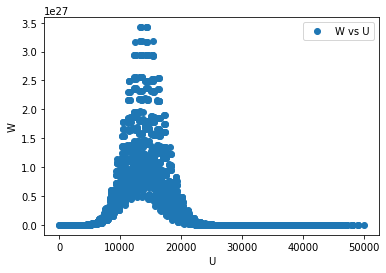

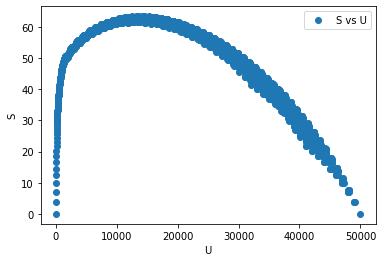

Tiempo:	 279.0573568


C:\isaac\anaconda1\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
tic = time.clock()
Ws,Ss,Us = simulate_and_plot(n,E_spectrum,maxi,1,True)
toc = time.clock()
print('Tiempo:\t',toc-tic)

In [49]:
def make_all(n,E_spectro,n_small = 5, error = 1,flag_plot = False):
    maxi = simulate_small_n(n_small,n,E_spectrum,flag = False)
    return simulate_and_plot(n,E_spectrum,maxi,error,flag_plot)

In [67]:
n = 10 #numero de particulas
E_sp = [1,2]
m = len(E_spectrum)
print('Numero total de soluciones como tuplas:\t',binomial(n+m-1,m-1))

Numero total de soluciones como tuplas:	 286.0


len energia	 66


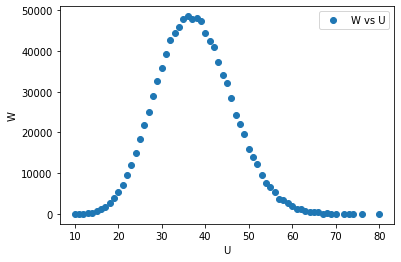

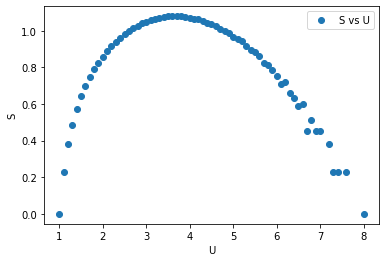

In [68]:
Simul_20 = make_all(10,E_sp,5,1,False)

#### Función de partición

In [62]:
beta_max = 100
beta = np.linspace(-beta_max,beta_max,2*beta_max)
Energies = np.asarray([1,10,100,1000,10000])
max_e = np.max(Energies)
Energies = Energies/max_e

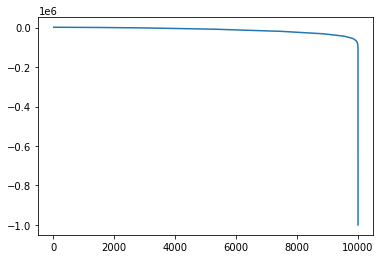

In [63]:
n = 50
Es,betas = np.meshgrid(Energies,beta)
Z = np.multiply(Es,betas)
#Z arreglo cuya fila i-esima represneta beta constante, columnas representan energias
#Z_ij = energia_j * beta_i
Ns = np.exp(-Z)
Q1 = np.sum(Ns,axis = 1)
Ep =  np.sum(np.multiply(Es,Ns),axis = 1)/Q1*max_e
Sp = np.log(Q1)+np.multiply(beta,Ep)
plt.plot(Ep,Sp,'-')